In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import json

import matplotlib.pyplot as plt
%matplotlib inline

Load the CSV file

In [2]:
ndvi = gpd.read_file('landsat8_ndvi_2018-2020_sample-2k.csv')

The location is exported from Google Earth Engine in GeoJSON format. We need to convert it to the format accepted for the GeoPandas geometry column.

In [3]:
ndvi['geometry'] = ndvi.apply(lambda row: shape(json.loads(row['.geo'])), axis=1)

The dates are strings when they are read in, so we convert them to Pandas DateTime objects.

In [4]:
ndvi['date'] = pd.to_datetime(ndvi['date'])

The geometry column allows us to plot the points spatially.

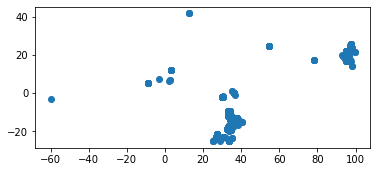

In [5]:
ndvi.plot()

We can also preview the data as with normal pandas dataframes.

In [6]:
ndvi.head()

,system:index,01-2018 to 02-2018,01-2019 to 02-2019,01-2020 to 02-2020,02-2018 to 03-2018,02-2019 to 03-2019,02-2020 to 03-2020,03-2018 to 04-2018,03-2019 to 04-2019,03-2020 to 04-2020,...,10-2020 to 11-2020,11-2018 to 12-2018,11-2019 to 12-2019,11-2020 to 12-2020,12-2018 to 01-2019,12-2019 to 01-2020,12-2020 to 01-2021,date,.geo,geometry
0,0,0.4125303030014038,0.28317514061927795,,0.4605826437473297,0.2888960540294647,,0.04861186072230339,0.4281831681728363,0.29043781757354736,...,0.12893478572368622,0.15392448008060455,0.2333373874425888,0.0888809934258461,0.13741245865821838,0.21476705372333527,0.18726448714733124,2020-02-03,"{""type"":""Point"",""coordinates"":[35.32,-15.39]}",POINT (35.32000 -15.39000)
1,1,0.1489490121603012,0.14988276362419128,0.07585914433002472,0.1529611498117447,0.1530293971300125,0.13753148913383484,0.14787781238555908,0.14382785558700562,0.1411036103963852,...,0.1493956297636032,0.17961393296718597,0.18961374461650848,0.14799261093139648,0.14081870019435883,0.1573752611875534,0.14265429973602295,2020-02-03,"{""type"":""Point"",""coordinates"":[95.13,22.12]}",POINT (95.13000 22.12000)
2,2,0.0806429535150528,0.24006950855255127,,0.27887722849845886,0.21174614131450653,0.07262792438268661,0.19706475734710693,0.3393693268299103,0.3207225203514099,...,0.10629143565893173,0.15993763506412506,0.11631131172180176,0.12974923849105835,0.09734513610601425,0.08893191069364548,0.13890498876571655,2020-02-03,"{""type"":""Point"",""coordinates"":[35.27,-13.06]}",POINT (35.27000 -13.06000)
3,3,0.10528296232223511,0.11243504285812378,0.10332165658473969,0.09719745069742203,0.10230612009763718,0.10391374677419662,0.1181308925151825,0.12203951179981232,0.11014188826084137,...,0.17543266713619232,0.14706951379776,0.15695501863956451,0.13548612594604492,0.1449538916349411,0.12134287506341934,0.1356714963912964,2020-02-03,"{""type"":""Point"",""coordinates"":[95.25,18.82]}",POINT (95.25000 18.82000)
4,4,0.1757315993309021,0.28190967440605164,0.20617562532424927,0.22363631427288055,0.2966252565383911,0.272464394569397,0.16276976466178894,0.15331533551216125,0.1397293210029602,...,0.2134152054786682,0.21598206460475922,0.1467892825603485,0.05699864402413368,0.1592201441526413,0.12017294019460678,0.09885216504335403,2020-02-03,"{""type"":""Point"",""coordinates"":[95.36,18.7]}",POINT (95.36000 18.70000)


The columns are currently written as a date range. To make feature/column selection operations easier, we can convert these to pd.DateTime objects using the penultimate day of the interval as the date.

In [7]:
def range_to_date(interval):
    start = interval.split('to')[0].strip()
    end = interval.split('to')[1].strip()
    return pd.date_range(start, end, freq='M')

In [8]:
new_cols = []
for col in ndvi.columns:
    if 'to' in col:
        new_cols.append(range_to_date(col)[0])
    else:
        new_cols.append(col)

In [9]:
ndvi.columns = new_cols

In [10]:
ndvi.head()

,system:index,2018-01-31 00:00:00,2019-01-31 00:00:00,2020-01-31 00:00:00,2018-02-28 00:00:00,2019-02-28 00:00:00,2020-02-29 00:00:00,2018-03-31 00:00:00,2019-03-31 00:00:00,2020-03-31 00:00:00,...,2020-10-31 00:00:00,2018-11-30 00:00:00,2019-11-30 00:00:00,2020-11-30 00:00:00,2018-12-31 00:00:00,2019-12-31 00:00:00,2020-12-31 00:00:00,date,.geo,geometry
0,0,0.4125303030014038,0.28317514061927795,,0.4605826437473297,0.2888960540294647,,0.04861186072230339,0.4281831681728363,0.29043781757354736,...,0.12893478572368622,0.15392448008060455,0.2333373874425888,0.0888809934258461,0.13741245865821838,0.21476705372333527,0.18726448714733124,2020-02-03,"{""type"":""Point"",""coordinates"":[35.32,-15.39]}",POINT (35.32000 -15.39000)
1,1,0.1489490121603012,0.14988276362419128,0.07585914433002472,0.1529611498117447,0.1530293971300125,0.13753148913383484,0.14787781238555908,0.14382785558700562,0.1411036103963852,...,0.1493956297636032,0.17961393296718597,0.18961374461650848,0.14799261093139648,0.14081870019435883,0.1573752611875534,0.14265429973602295,2020-02-03,"{""type"":""Point"",""coordinates"":[95.13,22.12]}",POINT (95.13000 22.12000)
2,2,0.0806429535150528,0.24006950855255127,,0.27887722849845886,0.21174614131450653,0.07262792438268661,0.19706475734710693,0.3393693268299103,0.3207225203514099,...,0.10629143565893173,0.15993763506412506,0.11631131172180176,0.12974923849105835,0.09734513610601425,0.08893191069364548,0.13890498876571655,2020-02-03,"{""type"":""Point"",""coordinates"":[35.27,-13.06]}",POINT (35.27000 -13.06000)
3,3,0.10528296232223511,0.11243504285812378,0.10332165658473969,0.09719745069742203,0.10230612009763718,0.10391374677419662,0.1181308925151825,0.12203951179981232,0.11014188826084137,...,0.17543266713619232,0.14706951379776,0.15695501863956451,0.13548612594604492,0.1449538916349411,0.12134287506341934,0.1356714963912964,2020-02-03,"{""type"":""Point"",""coordinates"":[95.25,18.82]}",POINT (95.25000 18.82000)
4,4,0.1757315993309021,0.28190967440605164,0.20617562532424927,0.22363631427288055,0.2966252565383911,0.272464394569397,0.16276976466178894,0.15331533551216125,0.1397293210029602,...,0.2134152054786682,0.21598206460475922,0.1467892825603485,0.05699864402413368,0.1592201441526413,0.12017294019460678,0.09885216504335403,2020-02-03,"{""type"":""Point"",""coordinates"":[95.36,18.7]}",POINT (95.36000 18.70000)


To visualize a sample time series, we want to first filter only the columns that are from the year the sample was collected in.

In [11]:
idx = 1930
s = ndvi.filter(like='%s' % ndvi.loc[idx, 'date'].year, axis='columns').loc[idx]

Convert string values to numeric values and plot the 12-month time series.

/Users/hkerner/anaconda2/envs/geo_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

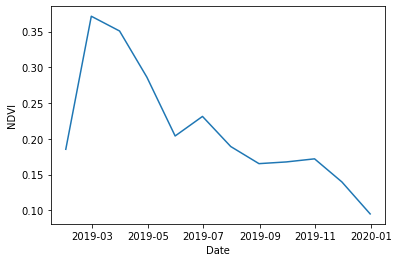

In [12]:
plt.plot(pd.to_numeric(s).interpolate(method='bfill'))
plt.ylabel('NDVI')
plt.xlabel('Date')